# Alucar - Analisando as vendas

## Analisando o Data Frame

In [95]:
import pandas as pd

In [96]:
alucar = pd.read_csv('alucar.csv')

In [97]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [98]:
print(f'Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [99]:
print('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [100]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [101]:
# convertendo a coluna mês para uma série temporal
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## Gerando e tratando gráficos

In [102]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

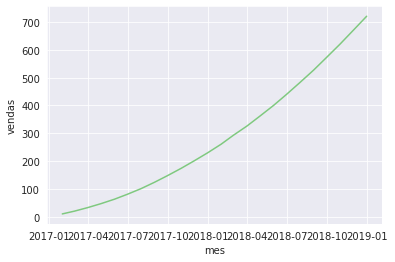

In [103]:
sns.lineplot(x='mes', y='vendas', data=alucar)

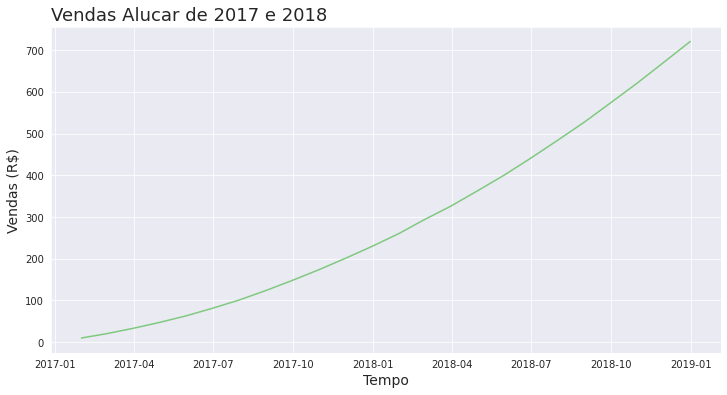

In [104]:
# mudando o tipo de cor do gráfico
sns.set_palette('Accent')
# incluindo o grid ao fundo
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
# alterando o tamanho do gráfico
ax.figure.set_size_inches(12,6)
# Incluindo o título, colocando-o a direita e tamanho de 18
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
# alterado o título do eixo X e Y
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
# atribuindo o gráfico ao próprio gráfico, para não aparecer informações fora do gráfico
ax = ax

In [105]:
# decompondo a coluna 'Vendas". O mês 2 - mês 1 e assim por diante.
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


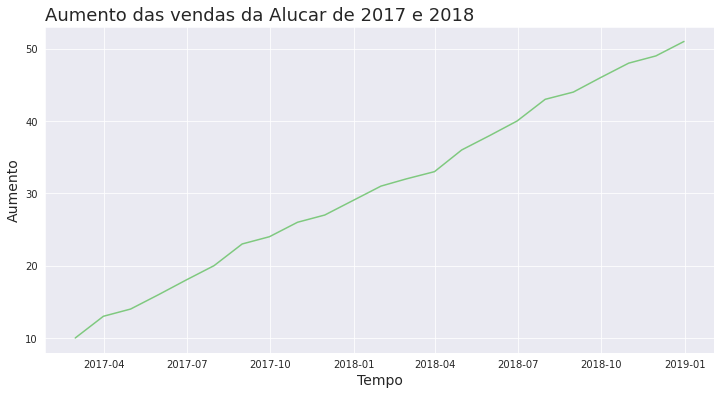

In [106]:
# mudando o tipo de cor do gráfico
sns.set_palette('Accent')
# incluindo o grid ao fundo
sns.set_style('darkgrid')
ay = sns.lineplot(x='mes', y='aumento', data=alucar)
# alterando o tamanho do gráfico
ay.figure.set_size_inches(12,6)
# Incluindo o título, colocando-o a direita e tamanho de 18
ay.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
# alterado o título do eixo X e Y
ay.set_xlabel('Tempo', fontsize=14)
ay.set_ylabel('Aumento', fontsize=14)
# atribuindo o gráfico ao próprio gráfico, para não aparecer informações fora do gráfico
ay = ay

## Definindo funções para tratamento de gráficos

In [107]:
def plotar(titulo, labelx, labely, x, y, dataset):
  # mudando o tipo de cor do gráfico
  sns.set_palette('Accent')
  # incluindo o grid ao fundo
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  # alterando o tamanho do gráfico
  ax.figure.set_size_inches(12,6)
  # Incluindo o título, colocando-o a direita e tamanho de 18
  ax.set_title(titulo, loc='left', fontsize=18)
  # alterado o título do eixo X e Y
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  # atribuindo o gráfico ao próprio gráfico, para não aparecer informações fora do gráfico
  ax = ax

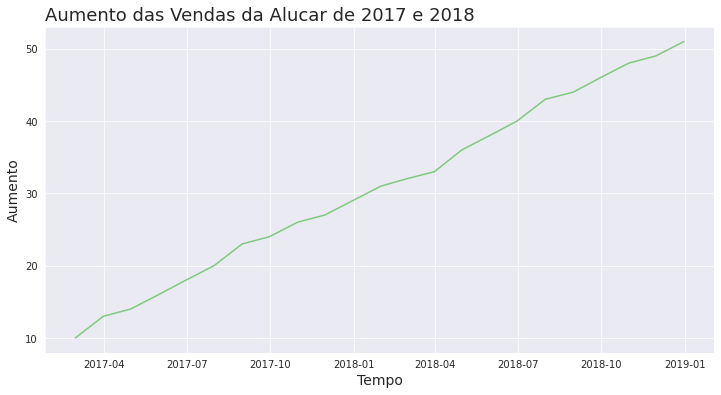

In [108]:
plotar( 'Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [109]:
# decompondo a coluna 'aumento". O mês 2 - mês 1 e assim por diante.
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


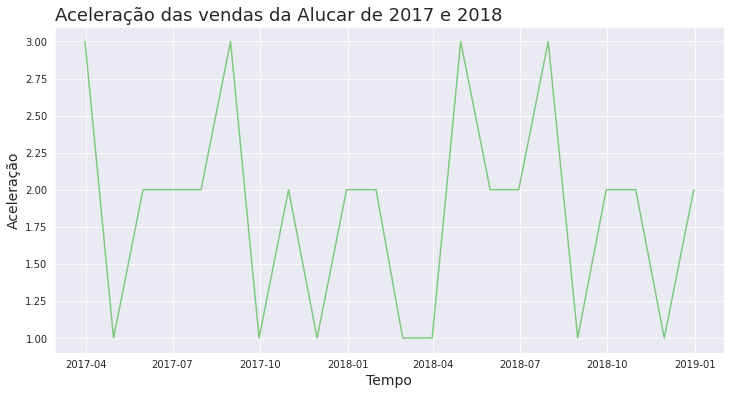

In [110]:
plotar( 'Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

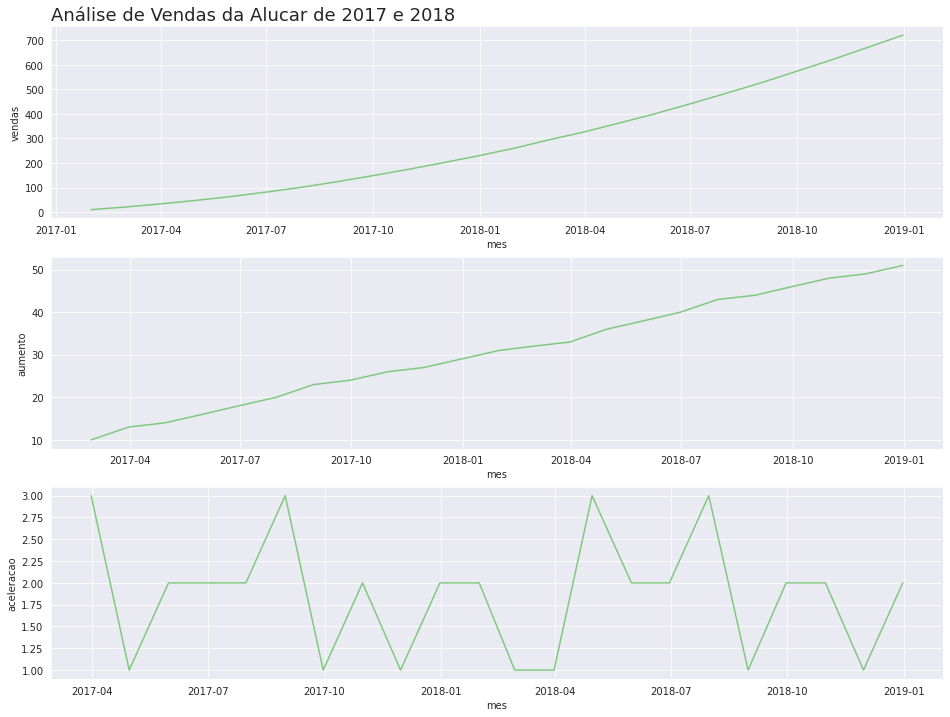

In [111]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [112]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  ax = plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)
  ax = plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

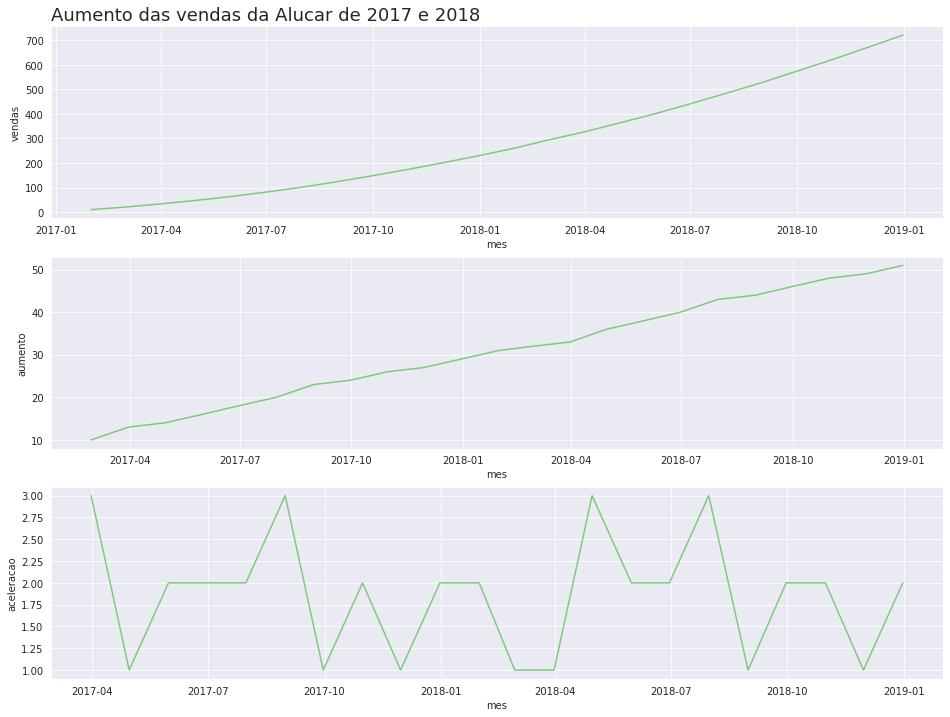

In [113]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Aumento das vendas da Alucar de 2017 e 2018')

## Autocorrelação

In [114]:
from pandas.plotting import autocorrelation_plot

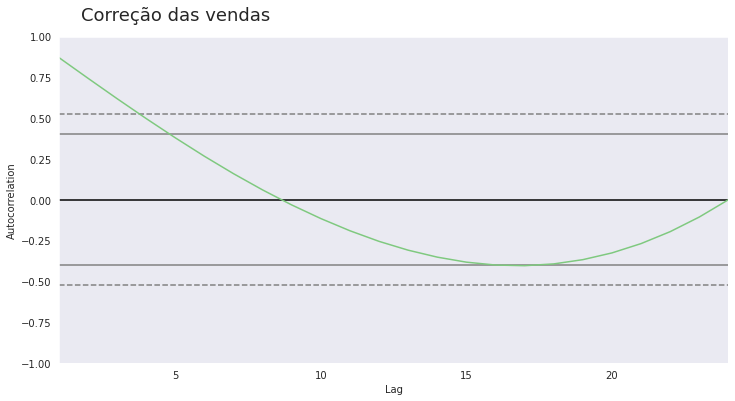

In [115]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correção das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

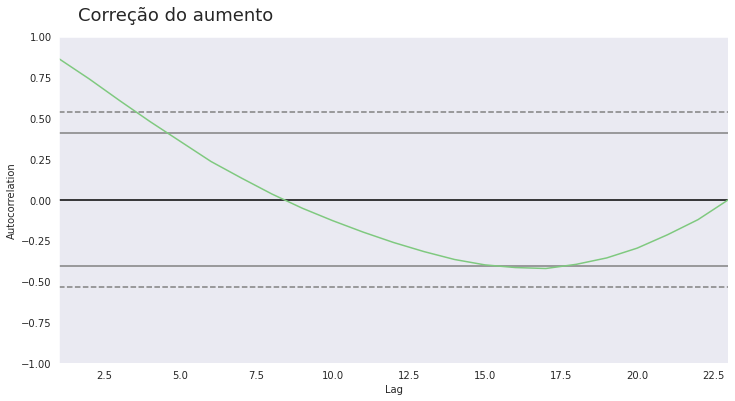

In [116]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correção do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

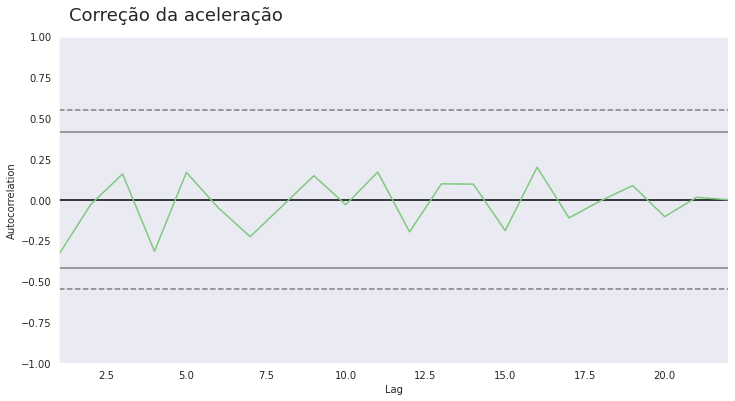

In [117]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correção da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

## Importando e analisando os dados

In [118]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [119]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [120]:
print(f'A quantidade de linhas e colunas', assinantes.shape)
print(f'Quantidade de dados nulos:', assinantes.isna().sum().sum())

A quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos: 0


In [121]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

## Decompondo assinaturas para descobrir o aumento e aceleração

In [122]:
# Decompondo as assinaturas de Newsletter
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


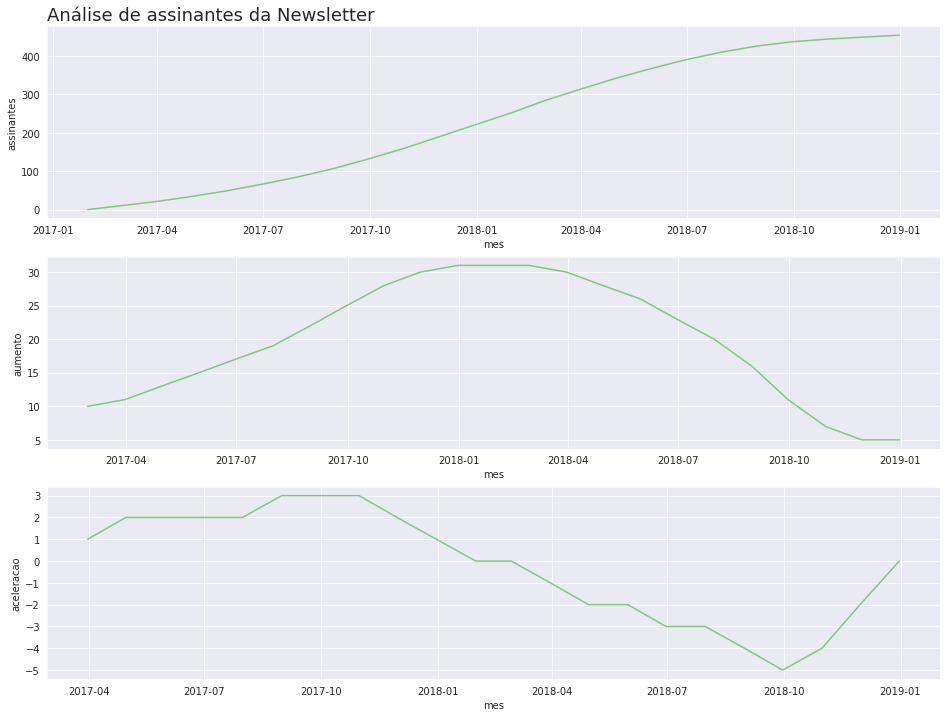

In [123]:
plot_comparacao('mes','assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

# Chocolura - Analisando as vendas

## Analisando os dados

In [124]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [125]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [126]:
print(f'Quantidade de linhas e colunas:', chocolura.shape)
print(f'Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


## Decompondo os dados

In [127]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

## Gerando gráficos de comparação

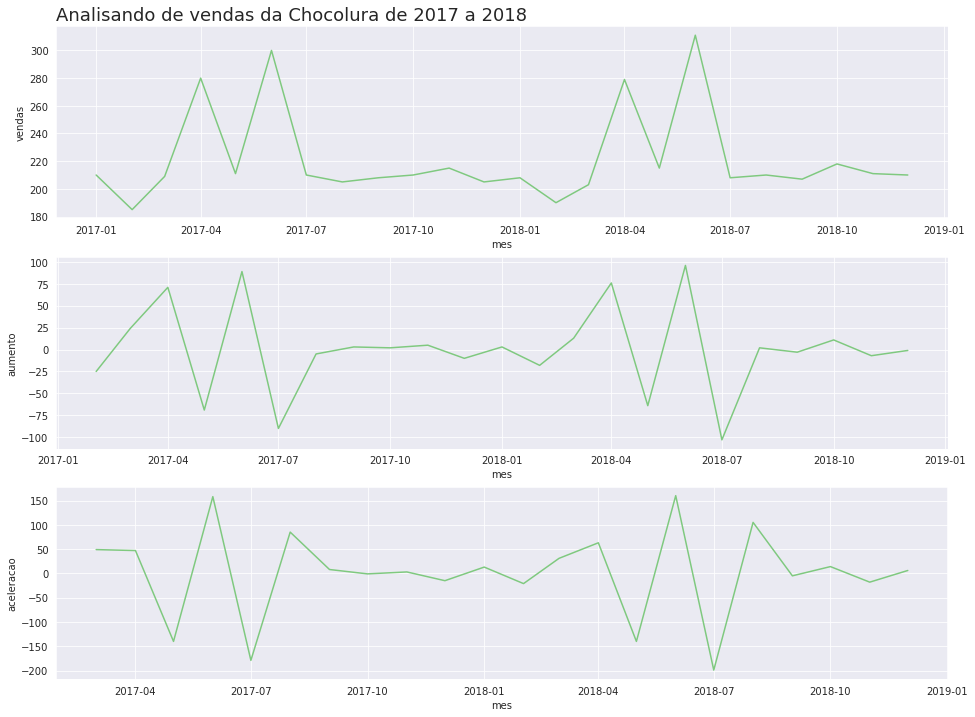

In [128]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Analisando de vendas da Chocolura de 2017 a 2018')

Visualmente é possível notar uma sazonalidade. Aumentando as vendas em Abril e Junho, devido a Páscoa e Dia dos Namorados, respectivamente.

# Chocolura - Vendas diárias (Outubro e Novembro)

In [129]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [130]:
print(f'Quantidade de linhas e colunas:', vendas_por_dia.shape)
print(f'Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos 0


In [131]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [132]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [133]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


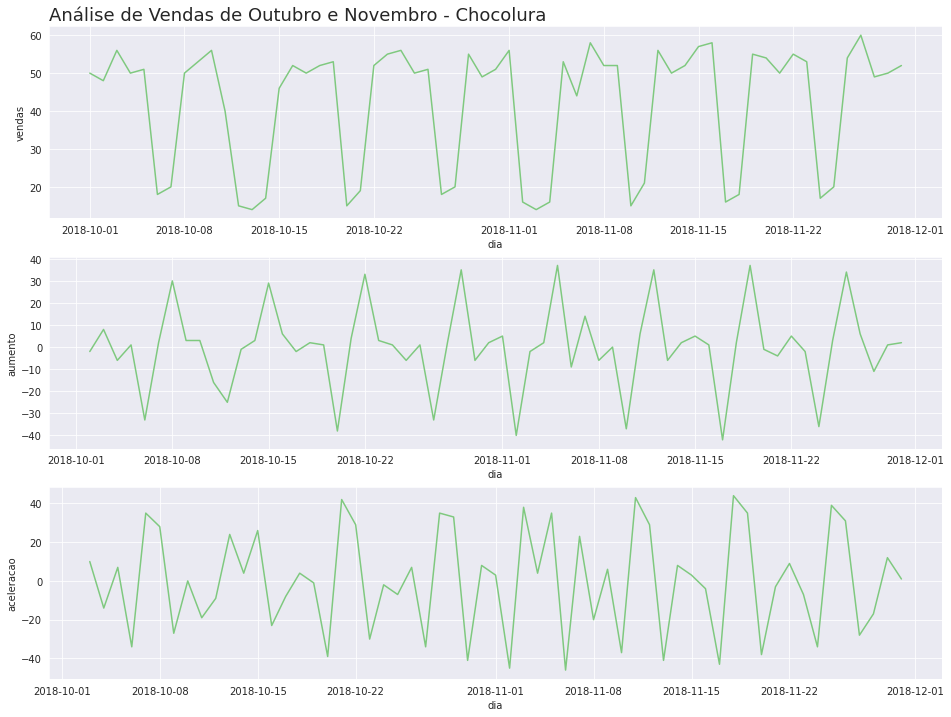

In [134]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade**

In [135]:
# Incluindo o nome do dia da semana no Data Frame
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [136]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [137]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 
                   'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday':'Sexta',
                   'Saturday': 'Sábado','Sunday': 'Domingo'}

In [138]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [139]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [141]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [142]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárais**

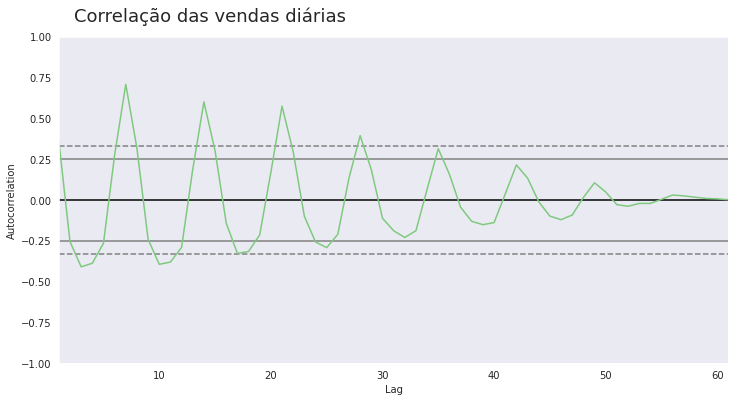

In [143]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

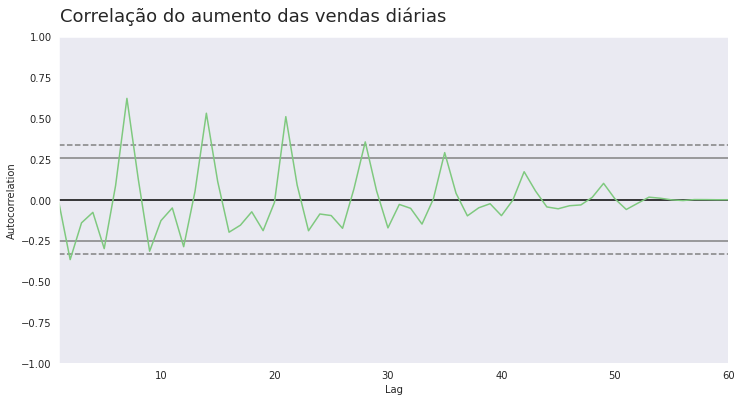

In [145]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

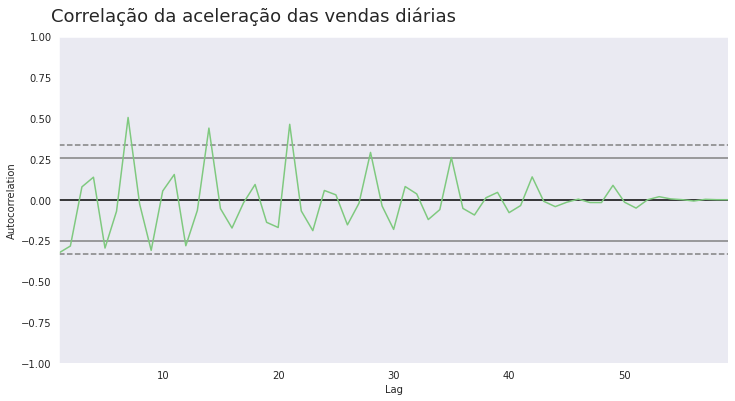

In [146]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [147]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [148]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [149]:
print(f'Quantidade de linhas e colunas:', cafelura.shape)
print(f'Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


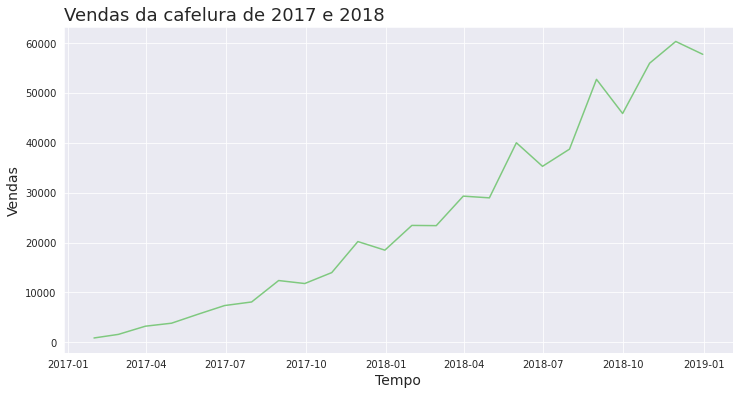

In [150]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

**Normalizando ruídos**

In [151]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [152]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [154]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


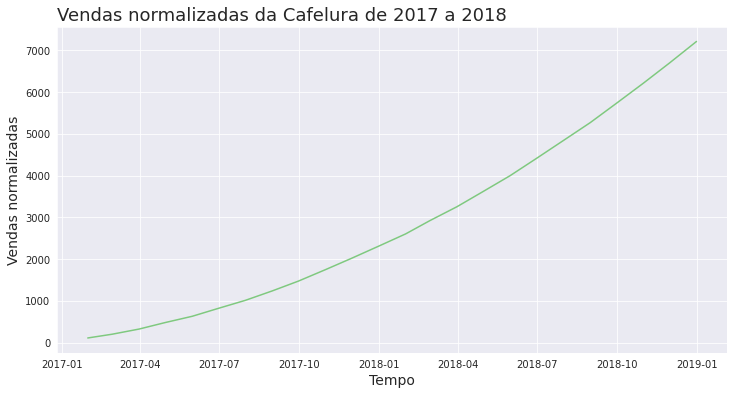

In [155]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

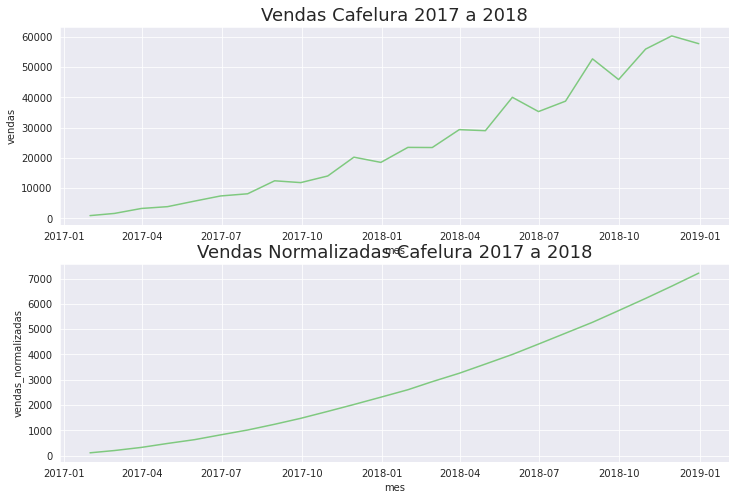

In [158]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 a 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose

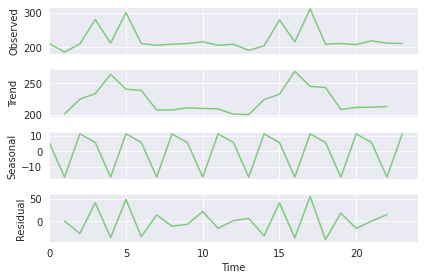

In [164]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [167]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [168]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


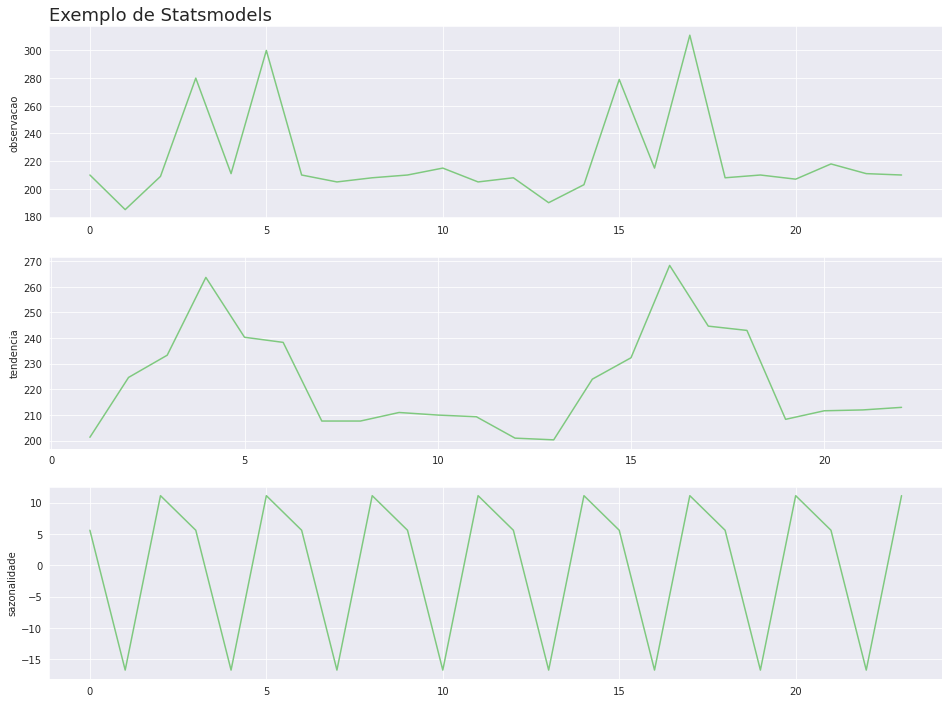

In [169]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [170]:
alucel = pd.read_csv('alucel.csv')

In [171]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [172]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [173]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [174]:
print(f'Quantidade de linhas e colunas:', alucel.shape)
print(f'Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [175]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


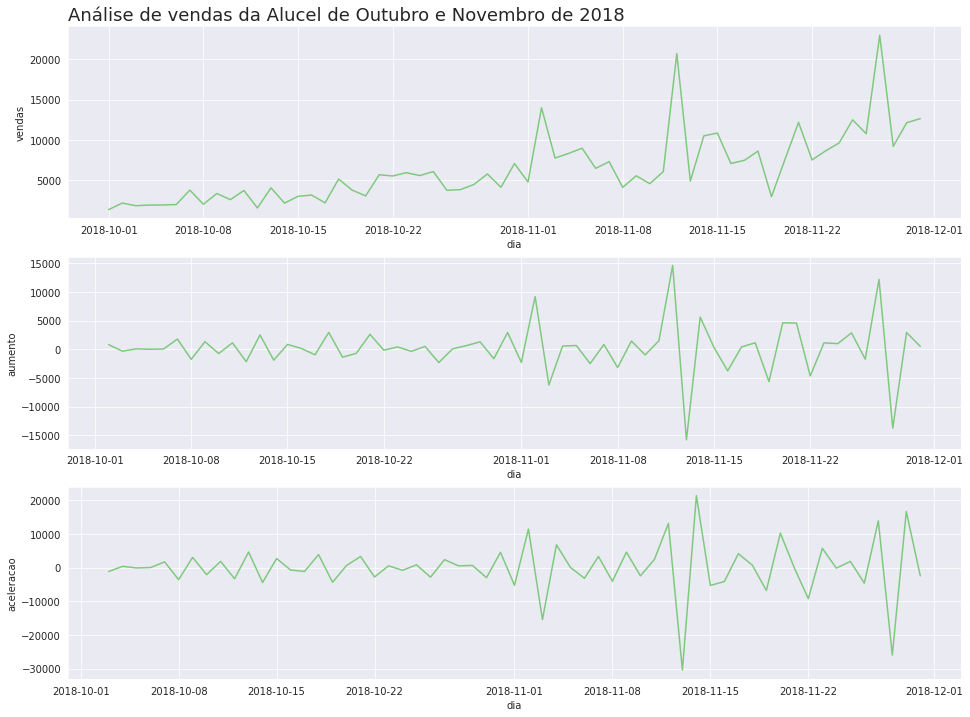

In [176]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel,'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média móvel**

In [177]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [179]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


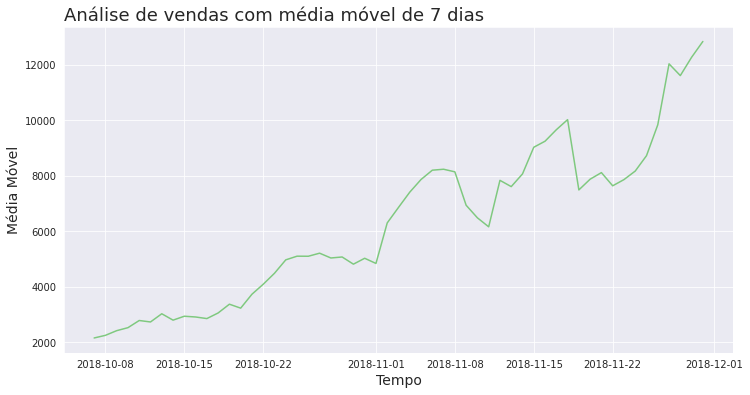

In [180]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [186]:
# criando a média móvel
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

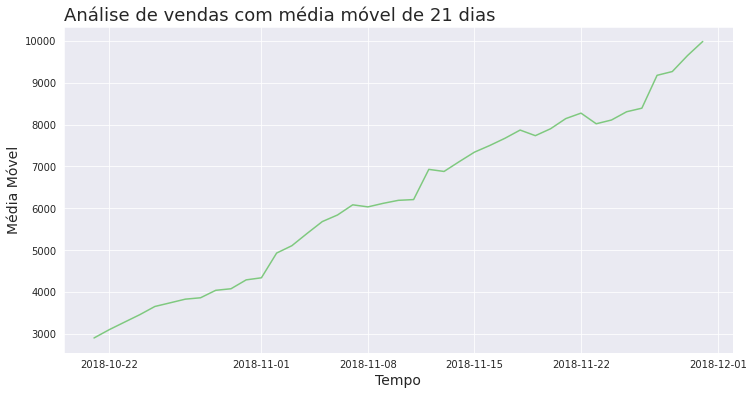

In [184]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

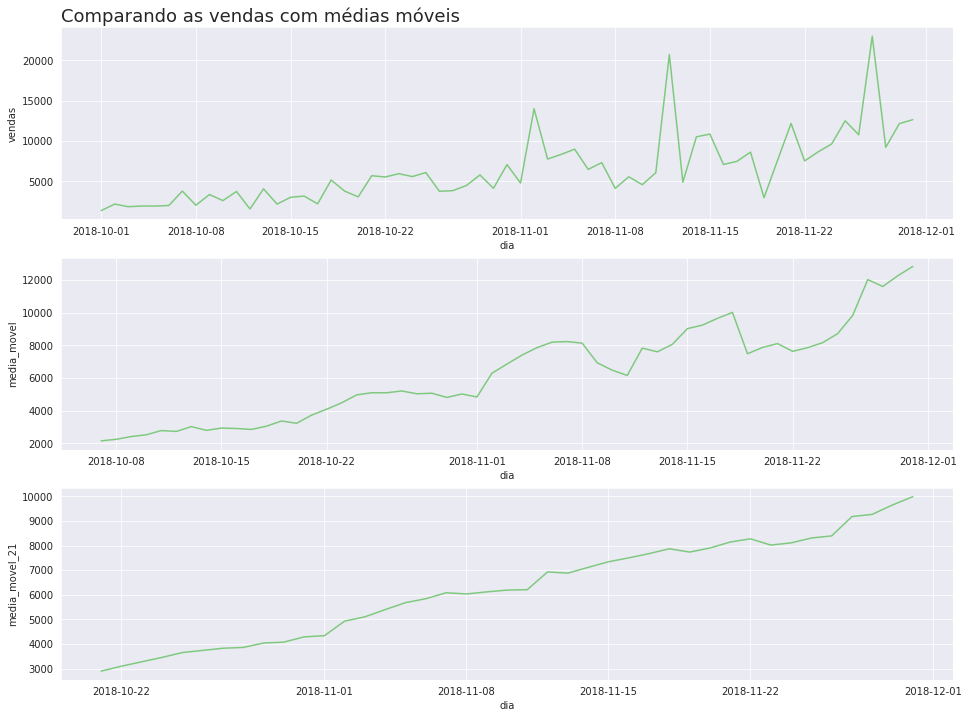

In [185]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')

# Encontrei dados Nulos! E agora?

[Caderno com 5 alternativas para contornar os dados nulos de uma Time Series](https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm)